In [33]:
import numpy as np
import matplotlib.pyplot as plt
from util import *





In [34]:
X,Y=getData(balance_ones=False)

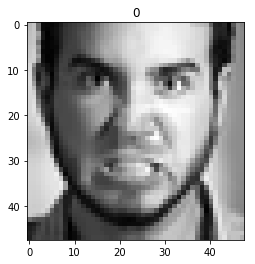

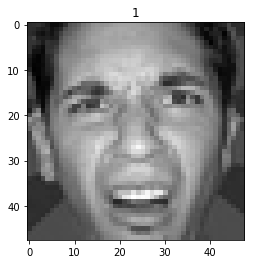

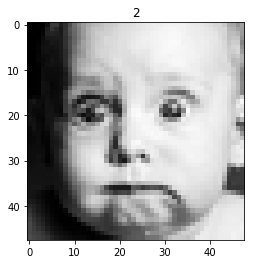

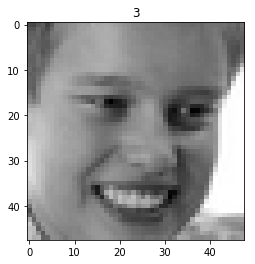

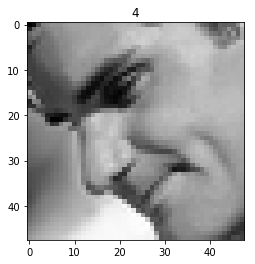

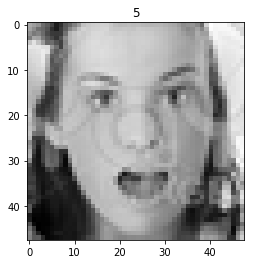

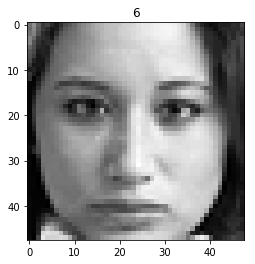

In [9]:
for i in range(7):
    x,y=X[Y==i],Y[Y==i]
    N=len(y)
    j=np.random.choice(N)
    plt.imshow(x[j].reshape(48,48),cmap='gray')
    plt.title(y[j])
    plt.show()

In [31]:
from sklearn.utils import shuffle

class ANN(object):
    def __init__(self,M):
        self.M=M
        
    def fit(self, X, Y, learning_rate=10e-7, reg=10e-7, epochs=10000, show_fig=False):
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        # Tvalid = y2indicator(Yvalid)
        X, Y = X[:-1000], Y[:-1000]

        N, D = X.shape
        K = len(set(Y))
        T = y2indicator(Y)
        self.W1 = np.random.randn(D, self.M) / np.sqrt(D)
        self.b1 = np.zeros(self.M)
        self.W2 = np.random.randn(self.M, K) / np.sqrt(self.M)
        self.b2 = np.zeros(K)

        costs = []
        best_validation_error = 1
        for i in range(epochs):
            # forward propagation and cost calculation
            pY, Z = self.forward(X)

            # gradient descent step
            pY_T = pY - T
            self.W2 -= learning_rate*(Z.T.dot(pY_T) + reg*self.W2)
            self.b2 -= learning_rate*(pY_T.sum(axis=0) + reg*self.b2)
            # dZ = pY_T.dot(self.W2.T) * (Z > 0) # relu
            dZ = pY_T.dot(self.W2.T) * (1 - Z*Z) # tanh
            self.W1 -= learning_rate*(X.T.dot(dZ) + reg*self.W1)
            self.b1 -= learning_rate*(dZ.sum(axis=0) + reg*self.b1)

            if i % 10 == 0:
                pYvalid, _ = self.forward(Xvalid)
                c = cost2(Yvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.argmax(pYvalid, axis=1))
                print("i:", i, "cost:", c, "error:", e)
                if e < best_validation_error:
                    best_validation_error = e
        print("best_validation_error:", best_validation_error)

        if show_fig:
            plt.plot(costs)
            plt.show()


    def forward(self, X):
        # Z = relu(X.dot(self.W1) + self.b1)
        Z = np.tanh(X.dot(self.W1) + self.b1)
        return softmax(Z.dot(self.W2) + self.b2), Z

    def predict(self, X):
        pY, _ = self.forward(X)
        return np.argmax(pY, axis=1)

    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)

In [35]:
X,Y=getBinaryData()
X0=X[Y==0,:]
X1=X[Y==1,:]
X1=np.repeat(X1,9,axis=0)
X=np.vstack([X0,X1])
Y=np.array([0]*len(X0)+[1]*len(X1))

model=ANN(100)
model.fit(X,Y)

i: 0 cost: 0.69279537957 error: 0.486
i: 10 cost: 0.698318369159 error: 0.501
i: 20 cost: 0.689788537984 error: 0.483
i: 30 cost: 0.673790636312 error: 0.419
i: 40 cost: 0.664829397165 error: 0.392
i: 50 cost: 0.659128229035 error: 0.384
i: 60 cost: 0.654763660415 error: 0.387
i: 70 cost: 0.651216124945 error: 0.382
i: 80 cost: 0.648438034988 error: 0.375
i: 90 cost: 0.646795472296 error: 0.37
i: 100 cost: 0.647440661959 error: 0.365
i: 110 cost: 0.651458953707 error: 0.373
i: 120 cost: 0.653440592554 error: 0.365


KeyboardInterrupt: 